In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn libraries for preprocessing and modeling
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# TensorFlow and Keras for building the neural network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.regularizers import l2

In [ ]:
# Load the dataset
df = pd.read_csv('Housing.csv')

# Display the first few rows of the dataset
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Check the shape of the dataset
df.shape

(545, 13)

In [ ]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
# Summary statistics for numerical columns
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
# check for missing values
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
# check for duplicated rows
df.duplicated().sum()


np.int64(0)

<ipython-input-23-86c1ddc3c66a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

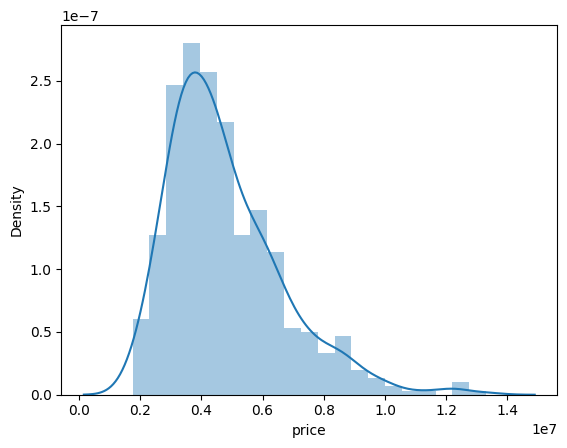

In [ ]:
sns.distplot(df['price'])

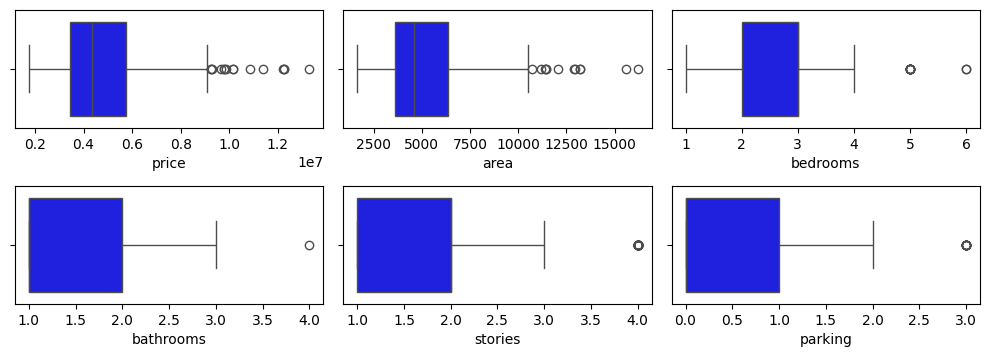

In [ ]:
#Check the ouliers using boxplot
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 5))

for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col], color='blue')

plt.tight_layout()
plt.show()

<Axes: >

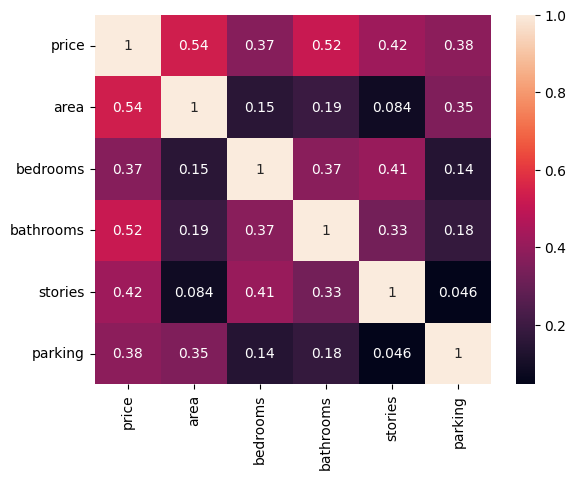

In [ ]:
#Check the corr. between columns before handling the data
correlation =df[num_cols].corr()
sns.heatmap(correlation, annot=True,)

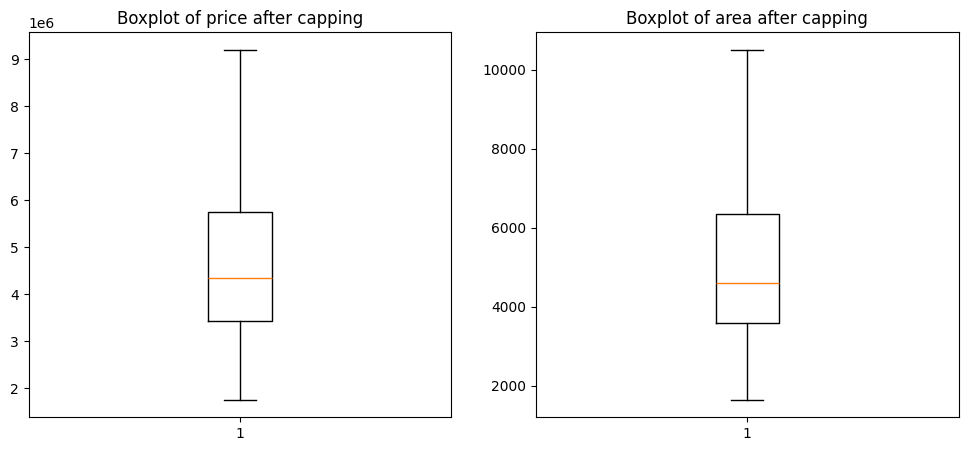

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# List of columns to cap outliers
columns_to_cap = ['price', 'area']

for col in columns_to_cap:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Boxplots to visualize capped data
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, col in enumerate(columns_to_cap):
    axes[i].boxplot(df[col])
    axes[i].set_title(f'Boxplot of {col} after capping')

plt.show()

In [ ]:
# Separate features and target
X = df.drop('price', axis=1)
y = df['price']

In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define numerical and categorical columns
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_cols = ['furnishingstatus', 'mainroad', 'guestroom', 'basement',
                   'hotwaterheating', 'airconditioning', 'prefarea']

In [ ]:
# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ]
)

In [ ]:
# Apply preprocessing to the training and testing data seperatitly to prevent data leakage
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# Scale target variable
price_scaler = StandardScaler()
y_train_scaled = price_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = price_scaler.transform(y_test.values.reshape(-1, 1))

In [ ]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.01),
                      input_shape=(X_train_processed.shape[1],)),
    keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    keras.layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mse']
)

In [ ]:
# Train the model
history = model.fit(
    X_train_processed,
    y_train_scaled,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 1.3379 - mse: 0.9387 - val_loss: 1.1651 - val_mse: 0.7739
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.0295 - mse: 0.6408 - val_loss: 1.0553 - val_mse: 0.6741
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9002 - mse: 0.5213 - val_loss: 0.9685 - val_mse: 0.5966
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.9334 - mse: 0.5637 - val_loss: 0.9078 - val_mse: 0.5451
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7648 - mse: 0.4044 - val_loss: 0.8602 - val_mse: 0.5069
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7424 - mse: 0.3913 - val_loss: 0.8214 - val_mse: 0.4772
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6823 - mse: 0.3405 - val_loss: 0.7892 - val_mse: 0.4544
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6302 - mse: 0.2977 - val_loss: 0.7693 - val_mse: 0.4439
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss:

In [ ]:
#Evaluate and make predictions
test_loss, test_mse = model.evaluate(X_test_processed, y_test_scaled, verbose=1)

# Make predictions
y_pred_scaled = model.predict(X_test_processed)
y_pred = price_scaler.inverse_transform(y_pred_scaled)

# Print the test MSE
print(f'\nTest Mean Squared Error (scaled): {test_mse:.4f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5719 - mse: 0.4778
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Test Mean Squared Error (scaled): 0.5091


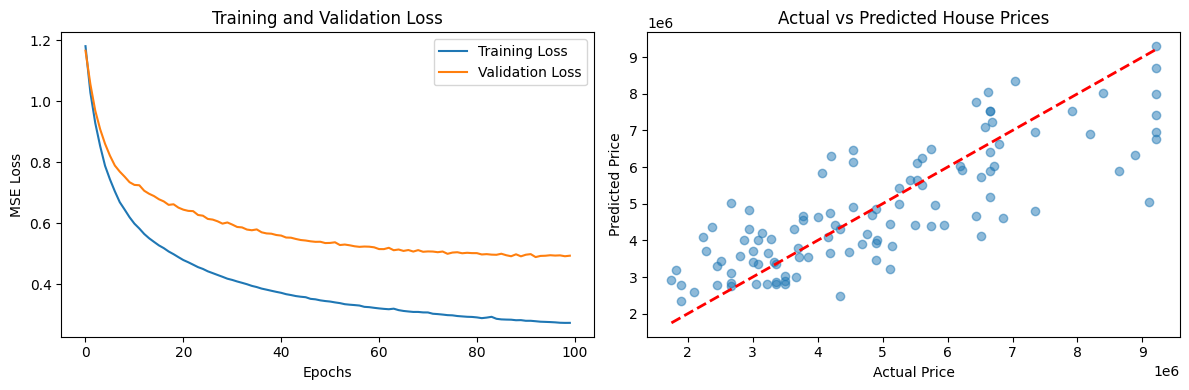

In [ ]:
# Training history plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Actual vs Predicted plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()